<a href="https://colab.research.google.com/github/azobenio/Machine-learning-TP/blob/master/02_2_Webscraping2_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## More WebScrapping

### Ressources utiles:
https://www.crummy.com/software/BeautifulSoup/bs4/doc/ <br>
https://www.webscraper.io/test-sites

**Quand vous scrappez, essayez toujours de simuler le comportement d'un humain, un scrapping trop intensif sur un site internet peut le casser. De plus, votre ip pourra être bloquée selon les moyens de protections des sites internet**

In [0]:
from bs4 import BeautifulSoup

<div class="alert alert-info">
  
**Exercice1:**
Soit le html suivant de citations   </div>  
 </div>   

In [0]:
html= """
<html>
    <head>
        <link rel="stylesheet" href="styles.css">
    </head>
    <body>
    
        <div class="block1">
            <h1> Les meilleurs citations </h1>

                <h2> Horace Mann </h2>
                <div>
                    <p class = "texte-h2"> "Be ashamed to die until you have won some victory for humanity"</p>
                    <p class = "salaire"> "Il est payé 3 €"</p>
                </div>

                <h2> Lelouch Vi Britannia </h2>
                <div>
                    <p class = "texte-h2" > "Vivre sans rien faire est pareil à une mort lente" </p>
                    <p class = "salaire"> "Il est payé 0€"</p>
                </div>

                    <h2> Nabilla </h2>
                <div>
                    <p class = "texte-h2"> "Non mais allo quoi"</p>
                    <p class = "salaire"> "Elle est payée 3000 €"</p>
                </div>
        </div>
        
        
        
        <div class="block2">
            <h1> Conclusions </h1>
                <h2> Une conclusion pas top</h2>
                <div>
                    <p class ="travail"> Work hard !</p>
                    <p class = "famille" > Par hard !</p>
                    <p class = "party" > Party hard !</p>
                </div>
        </div>
        
        <div class="block2 fin">
            <h2> c'est un faux block 2</h2>
        </div>
        <p id = "outlier" title="MrMoche">Ce paragraphe là n'a rien à faire ici 300 €</p
    </body>

</html>

"""

soup = BeautifulSoup(html, 'html.parser')
#soup2 = BeautifulSoup(open('site.html'),'html.parser')

## FindAll

In [0]:
#retourner une liste de toutes les balises "h1"
liste_h1_brut = soup.findAll('h1')
print(liste_h1_brut)
print(liste_h1_brut[1])
print(liste_h1_brut[0].string)


[<h1> Les meilleurs citations </h1>, <h1> Conclusions </h1>]
<h1> Conclusions </h1>
 Les meilleurs citations 


In [0]:
#retourner une liste de toutes les valeurs à l'intérieur des balises "h1"
liste_h1 = [h1.string for h1 in liste_h1_brut]
print(liste_h1)

[' Les meilleurs citations ', ' Conclusions ']


In [0]:
#pareil avec 'p'
soup.findAll('p')

[<p class="texte-h2"> "Be ashamed to die until you have won some victory for humanity"</p>,
 <p class="salaire"> "Il est payé 3 €"</p>,
 <p class="texte-h2"> "Vivre sans rien faire est pareil à une mort lente" </p>,
 <p class="salaire"> "Il est payé 0€"</p>,
 <p class="texte-h2"> "Non mais allo quoi"</p>,
 <p class="salaire"> "ceci n'est pas un salaire 3000 €"</p>,
 <p class="salaire"> "Elle est payée 3000 €"</p>,
 <p class="travail"> Work hard !</p>,
 <p class="famille"> Par hard !</p>,
 <p class="party"> Party hard !</p>,
 <p id="outlier" title="MrMoche">Ce paragraphe là n'a rien à faire ici 300 €</p>]

In [0]:
#si on veut sortir ceux d'une classe particulière:
soup.findAll('p', {'class':'travail'})

[<p class="travail"> Work hard !</p>]

In [0]:
#si on veut sortir ceux de plusieurs classes:
soup.findAll('p',{'class':['travail','texte-h2']})


[<p class="texte-h2"> "Be ashamed to die until you have won some victory for humanity"</p>,
 <p class="texte-h2"> "Vivre sans rien faire est pareil à une mort lente" </p>,
 <p class="texte-h2"> "Non mais allo quoi"</p>,
 <p class="travail"> Work hard !</p>]

In [0]:
#Trouver le titre avec .attrs (! Cela ne fonctionne que sur un élément, noter le find au lieu du findAll)
soup.find("p",{"id":'outlier'}).attrs['title'] 


'MrMoche'

## Select

In [0]:
#Select permet de récupérer des élements par rapport à leur "arborescence"
soup.select('div h2') #il cherche dans toute les divs les h2

[<h2> Horace Mann </h2>,
 <h2> Lelouch Vi Britannia </h2>,
 <h2> Nabilla </h2>,
 <h2> Une conclusion pas top</h2>,
 <h2> c'est un faux block 2</h2>]

In [0]:
soup.select('div.block2 h2') #il cherche les h2 dans toute les divs ayant la class block2

[<h2> Une conclusion pas top</h2>, <h2> c'est un faux block 2</h2>]

In [0]:
soup.select('div.block2.fin h2') #il cherche les h2 dans toute les divs ayant la class block2 et fin 

[<h2> c'est un faux block 2</h2>]

In [0]:
#Trouver le titre avec .attrs (! Cela ne fonctionne que sur un élément, noter le select_one au lieu du select)
soup.select_one("#outlier").attrs['title']

'MrMoche'

<div class="alert alert-success">

**1-**
    
Récupérer toutes les citations 
    
!!indication: vérifier la classe: p.texte-h2
    
</div>  

In [0]:
texte_brut = soup.select('div.block1 div')
print(texte_brut)
citation_brute = [div.select('p.texte-h2')for div in texte_brut]
print(citation_brute)
citations= [j.string for i in citation_brute for j in i]
citations

[<div>
<p class="texte-h2"> "Be ashamed to die until you have won some victory for humanity"</p>
<p class="salaire"> "Il est payé 3 €"</p>
</div>, <div>
<p class="texte-h2"> "Vivre sans rien faire est pareil à une mort lente" </p>
<p class="salaire"> "Il est payé 0€"</p>
</div>, <div>
<p class="texte-h2"> "Non mais allo quoi"</p>
<p class="salaire"> "Elle est payée 3000 €"</p>
</div>]
[[<p class="texte-h2"> "Be ashamed to die until you have won some victory for humanity"</p>], [<p class="texte-h2"> "Vivre sans rien faire est pareil à une mort lente" </p>], [<p class="texte-h2"> "Non mais allo quoi"</p>]]


[' "Be ashamed to die until you have won some victory for humanity"',
 ' "Vivre sans rien faire est pareil à une mort lente" ',
 ' "Non mais allo quoi"']

<div class="alert alert-success">

**2-**
    
créer un dictionnaire avec les noms des auteurs des citations en clés et les citations en valeurs   </div> 


In [0]:
noms_brut = soup.select('div.block1 h2')
noms = [h2.string for h2 in noms_brut]
print(citations)
print(noms)

dico = dict(zip(noms,citations))
dico

[' "Be ashamed to die until you have won some victory for humanity"', ' "Vivre sans rien faire est pareil à une mort lente" ', ' "Non mais allo quoi"']
[' Horace Mann ', ' Lelouch Vi Britannia ', ' Nabilla ']


{' Horace Mann ': ' "Be ashamed to die until you have won some victory for humanity"',
 ' Lelouch Vi Britannia ': ' "Vivre sans rien faire est pareil à une mort lente" ',
 ' Nabilla ': ' "Non mais allo quoi"'}

In [0]:
print(noms)
print(citations)

[' Horace Mann ', ' Lelouch Vi Britannia ', ' Nabilla ']
[' "Be ashamed to die until you have won some victory for humanity"', ' "Vivre sans rien faire est pareil à une mort lente" ', ' "Non mais allo quoi"']


In [0]:
noms = soup.select('.block1 h2')
citations = soup.select('.texte-h2')
dico = {}
for i in range(len(noms)):
    dico[noms[i].text] = citations[i].text
dico

{' Horace Mann ': ' "Be ashamed to die until you have won some victory for humanity"',
 ' Lelouch Vi Britannia ': ' "Vivre sans rien faire est pareil à une mort lente" ',
 ' Nabilla ': ' "Non mais allo quoi"'}

<div class="alert alert-success">

**3-**
    
Calculer la moyenne des salaires (en utilisant regex pour récupérer les salaires, évidemment)
   </div> 


In [0]:
import re
from statistics import mean 

In [0]:
salaire_balise = soup.select('div.block1 p.salaire')
print(salaire_balise)
#salaire_string = re.findall(r'payé\D*(\d+)', str(salaire_balise[0]))
salaire_string = [re.findall('payé(?:e)* (\d+)',i.string)[0] \
                  for i in salaire_balise if re.findall('payé(?:e)? (\d+)',i.string) !=[]]


print(salaire_string)
salaire = [float(i) for i in salaire_string]
print(mean(salaire))

[<p class="salaire"> "Il est payé 3 €"</p>, <p class="salaire"> "Il est payé 0€"</p>, <p class="salaire"> "Elle est payée 3000 €"</p>]
['3', '0', '3000']
1001.0


In [0]:
salaire_balise = soup.select('.salaire')
ma_liste = [j.string for i in salaire_balise for j in i]
print(ma_liste)
salaires = re.findall( r'payé\D* (\d+)', str(ma_liste))
print(salaires)

for i in range(len(salaires)):
    salaires[i]=int(salaires[i])

mean(salaires)

[' "Il est payé 3 €"', ' "Il est payé 0€"', ' "Elle est payée 3000 €"']
['3', '0', '3000']


1001

<div class="alert alert-info">
  
**Exercice2:**
Soit pour scrapping et analyse la série Game of Thrones à partir du site de la base de films imdb suivant : http://www.imdb.com/title/tt0944947/episodes    </div>  


In [0]:
import requests
from bs4 import BeautifulSoup

<div class="alert alert-success">

**1-**
- Recupérer dans une liste les 8 saisons de  Game of Thrones
    
- Récupérer la liste des épisodes ainsi que le rating de chacune
    
    indications: voir les classes 'eplist' et 'ipl-rating-star__rating'

</div>
   

In [0]:


url = 'http://www.imdb.com/title/tt0944947/episodes'

episodes = []
ratings = []

# Go over seasons 1 to 8
for season in range(1, 9):
    r = requests.get(url, params={'season': season})
    soup = BeautifulSoup(r.text, 'html.parser')
    listing = soup.find('div', class_='eplist')
    for epnr, div in enumerate(listing.find_all('div', recursive=False)):
        episode = "{}.{}".format(season, epnr + 1)
        rating_el = div.find(class_='ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print('Episode:', episode, '-- rating:', rating)
        episodes.append(episode)
        ratings.append(rating)



Episode: 1.1 -- rating: 9.1
Episode: 1.2 -- rating: 8.8
Episode: 1.3 -- rating: 8.7
Episode: 1.4 -- rating: 8.8
Episode: 1.5 -- rating: 9.1
Episode: 1.6 -- rating: 9.2
Episode: 1.7 -- rating: 9.2
Episode: 1.8 -- rating: 9.0
Episode: 1.9 -- rating: 9.6
Episode: 1.10 -- rating: 9.5
Episode: 2.1 -- rating: 8.8
Episode: 2.2 -- rating: 8.5
Episode: 2.3 -- rating: 8.8
Episode: 2.4 -- rating: 8.8
Episode: 2.5 -- rating: 8.8
Episode: 2.6 -- rating: 9.1
Episode: 2.7 -- rating: 8.9
Episode: 2.8 -- rating: 8.8
Episode: 2.9 -- rating: 9.7
Episode: 2.10 -- rating: 9.4
Episode: 3.1 -- rating: 8.8
Episode: 3.2 -- rating: 8.6
Episode: 3.3 -- rating: 8.9
Episode: 3.4 -- rating: 9.6
Episode: 3.5 -- rating: 9.0
Episode: 3.6 -- rating: 8.8
Episode: 3.7 -- rating: 8.7
Episode: 3.8 -- rating: 9.0
Episode: 3.9 -- rating: 9.9
Episode: 3.10 -- rating: 9.1
Episode: 4.1 -- rating: 9.1
Episode: 4.2 -- rating: 9.7
Episode: 4.3 -- rating: 8.9
Episode: 4.4 -- rating: 8.8
Episode: 4.5 -- rating: 8.7
Episode: 4.6 -- r

In [0]:
len(episodes)

73

In [0]:

url = 'http://www.imdb.com/title/tt0944947/episodes'

episodes = []
ratings = []
ratings_list=[]
# Go over seasons 1 to 8
for season in range(1, 9):
    r = requests.get(url, params={'season': season})
    soup = BeautifulSoup(r.text, 'html.parser')

    for episode_title in soup.select('.info strong a'):
        episodes.append(episode_title.text)

    for rating in soup.select('div.info div.ipl-rating-widget div.ipl-rating-star.small span.ipl-rating-star__rating'):
        ratings.append(rating.text)
    ratings_season = dict(zip(episodes, ratings))
    ratings_list.append(ratings_season)
    
ratings_list

[{'Winter Is Coming': '9.1',
  'The Kingsroad': '8.8',
  'Lord Snow': '8.7',
  'Cripples, Bastards, and Broken Things': '8.8',
  'The Wolf and the Lion': '9.1',
  'A Golden Crown': '9.2',
  'You Win or You Die': '9.2',
  'The Pointy End': '9.0',
  'Baelor': '9.6',
  'Fire and Blood': '9.5'},
 {'Winter Is Coming': '9.1',
  'The Kingsroad': '8.8',
  'Lord Snow': '8.7',
  'Cripples, Bastards, and Broken Things': '8.8',
  'The Wolf and the Lion': '9.1',
  'A Golden Crown': '9.2',
  'You Win or You Die': '9.2',
  'The Pointy End': '9.0',
  'Baelor': '9.6',
  'Fire and Blood': '9.5',
  'The North Remembers': '8.8',
  'The Night Lands': '8.5',
  'What Is Dead May Never Die': '8.8',
  'Garden of Bones': '8.8',
  'The Ghost of Harrenhal': '8.8',
  'The Old Gods and the New': '9.1',
  'A Man Without Honor': '8.9',
  'The Prince of Winterfell': '8.8',
  'Blackwater': '9.7',
  'Valar Morghulis': '9.4'},
 {'Winter Is Coming': '9.1',
  'The Kingsroad': '8.8',
  'Lord Snow': '8.7',
  'Cripples, Basta

<div class="alert alert-success">

**2-**
- Représenter le récapitulatif du résultat précédent par un bar plot (rating des différentes épisodes des toutes les saisons)  
</div>
   

In [0]:
import matplotlib.pyplot as plt

In [0]:
episodes1 = ['S' + e.split('.')[0] if int(e.split('.')[1]) == 1 else '' for e in episodes]
print(episodes)
print(episodes1)

['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '6.10', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6']
['S1', '', '', '', '', '', '', '', '', '', 'S2', '', '', '', '', '', '', '', '', '', 'S3', '', '', '', '', '', '', '', '', '', 'S4', '', '', '', '', '', '', '', '', '', 'S5', '', '', '', '', '', '', '', '', '', 'S6', '', '', '', '', '', '', '', '', '', 'S7', '', '', '', '', '', '', 'S8', '', '', '', '', '']


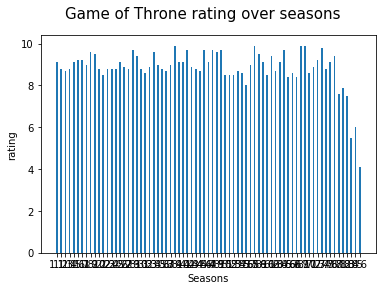

In [0]:

plt.figure()
positions = [a*2 for a in range(len(ratings))]
plt.bar(positions, ratings, align='center')
plt.xticks(positions, episodes1)
plt.xlabel("Seasons")
plt.ylabel("rating")

plt.suptitle('Game of Throne rating over seasons', fontsize=15)
plt.show()

## Bonus : Parse a dynamic page using Selenium:

Refaire l'execice avec ce site internet : https://www.webscraper.io/test-sites/e-commerce/static/computers/laptops

The website https://webscraper.io has some fake pages to test scraping on.
we'll use it on the page https://www.webscraper.io/test-sites/e-commerce/static/computers/laptops to get the product name and the price for the six items listed on the first page. 

<div class="alert alert-success">
The steps to Parse a dynamic page using Selenium are:

1- Initialize a driver (a Python object that controls a browser window)
    
2- Direct the driver to the URL we want to scrape.
    
3- Wait for the driver to finish executing the javascript, and changing the HTML. 
    
The driver is typically a Chrome driver, so  the page is treated the same way as if you were visiting it in Chrome.
    
5- Use driver.page_source to get the HTML as it appears after javascript has rendered it.
    
6- Use a parser on the returned HTML
    
</div>

In [0]:
#Import Libraries

from bs4 import BeautifulSoup
from selenium import webdriver
import time

In [0]:
from webdriver_manager.chrome import ChromeDriverManager

#driver = webdriver.Chrome(ChromeDriverManager().install())

# Change argument to the location you installed the chrome driver
# (see selenium installation instructions, or get the driver for your
# system from https://sites.google.com/a/chromium.org/chromedriver/downloads)
driver = webdriver.Chrome('C:/Users/Utilisateur/Desktop/IA_School_niv1/chromedriver_win32/chromedriver.exe')


In [0]:
url = 'https://www.webscraper.io/test-sites/e-commerce/static/computers/laptops'
driver.get(url)

In [0]:
# Give the javascript time to render
time.sleep(1)

# Now we have the page, let BeautifulSoup do the rest!
soup = BeautifulSoup(driver.page_source)

# The text containing title and price are in a
# div with class caption.
for caption in soup.find_all(class_='caption'):
    product_name = caption.find(class_='title').text
    price = caption.find(class_='pull-right price').text
    print(product_name, price)

Packard 255 G2 $416.99
Aspire E1-510 $306.99
ThinkPad T540p $1178.99
ProBook $739.99
ThinkPad X240 $1311.99
Aspire E1-572G $581.99


### Useful ressources:
La doc : https://selenium-python.readthedocs.io/navigating.html<br>
cheatsheet : http://allselenium.info/python-selenium-commands-cheat-sheet-frequently-used/<br>
moins complète mais plus propre : http://akul.me/blog/2016/selenium-cheatsheet/ <br>
